In [1]:
%pip install pandas numpy

%pip install matplotlib

%pip install sympy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\dangn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\dangn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB 1.3 MB/s eta 0:00:05
    --------------------------------------- 0.1/6.2 MB 1.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.3/6.2 MB 3.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.0/6.2 MB 6.2 MB/s eta 0:00:01
   ---------- ----------------------------- 1.7/6.2 MB 8.1 MB/s eta 0:00:01
   ---------- ----------------------------- 1.7/6.2 MB 8.1 MB/s eta 0:00:01
   ---------- ----------------------------- 1.7/6.2 MB 8.1 MB/s eta 0:00:01
   ---------- ----------------------------- 1.7/6.2 MB 8.1 MB/s eta 0:00:01
   ---------------------- ----------------- 3.5/6.2 MB 9.0 MB/s eta 0:00:01
   ---------------------------- ----------- 4.4/6.2 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------  6.1/6.2 MB 12.5 MB/s eta 0:00:01
   ------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\dangn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv("clean_weather.csv", index_col = 0)
data = data.ffill()

data["tmax"].head(10)

1970-01-01    60.0
1970-01-02    52.0
1970-01-03    52.0
1970-01-04    53.0
1970-01-05    52.0
1970-01-06    50.0
1970-01-07    52.0
1970-01-08    56.0
1970-01-09    54.0
1970-01-10    57.0
Name: tmax, dtype: float64

In [23]:
data["tmax"].head(10).to_numpy()[np.newaxis,:]

array([[60., 52., 52., 53., 52., 50., 52., 56., 54., 57.]])

In [24]:
np.random.seed(0)

i_weight = np.random.rand(1,2)
h_weight = np.random.rand(2,2)
o_weight = np.random.rand(2,1)

temps = data["tmax"].tail(3).to_numpy()
temps

array([66., 70., 62.])

In [25]:
x0 = temps[0].reshape(1,1)
x1 = temps[1].reshape(1,1)
x2 = temps[2].reshape(1,1)

In [26]:
xi_0 = x0 @ i_weight

# RELU for hiddens tate 
xh_0 = np.maximum(0, xi_0)

# First Output
xo_0 = xh_0 @ o_weight

print(xh_0)
print(xo_0)

[[36.22169126 47.20249818]]
[[57.94406231]]


In [27]:
#STEP 1 RNN

xi_1 = x1 @ i_weight

xh = xh_0 @ h_weight

xh_1 = np.maximum(0, xh + xi_1)

xo_1 = xh_1 @ o_weight

xo_1

array([[124.54916092]])

In [28]:
xi_2 = x2 @ i_weight

xh = xh_1 @ h_weight

xh_2 = np.maximum(0, xh + xi_2)

xo_2 = xh_2 @ o_weight

xo_2

array([[190.94853131]])

In [29]:
#Nonlinearity Issues (Keep Increasing)

print(xh_0)
print(xh_1)
print(xh_2)

[[36.22169126 47.20249818]]
[[ 80.24761908 100.28766177]]
[[124.88411227 152.84252918]]


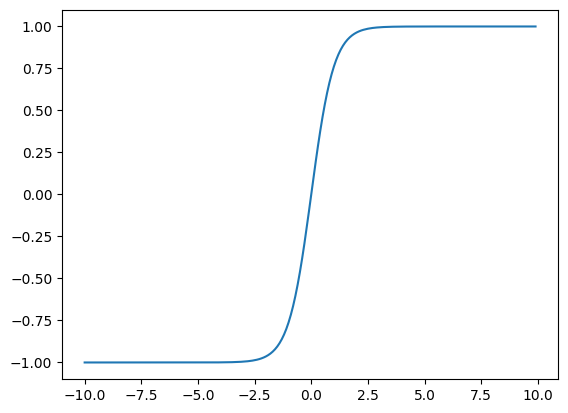

In [35]:
#Apply the TANH activation function
import matplotlib.pyplot as plt

temps = np.arange(-10, 10, .1)


plt.plot(temps, np.tanh(temps))

In [3]:
x = symbols("x")
sympy_tanh = (exp(x) - exp(-x)) / (exp(x) + exp(-x))
diff(sympy_tanh, x)

(-exp(x) + exp(-x))*(exp(x) - exp(-x))/(exp(x) + exp(-x))**2 + 1